<a href="https://colab.research.google.com/github/ahmer1000/First/blob/master/firstcolabimagedisection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


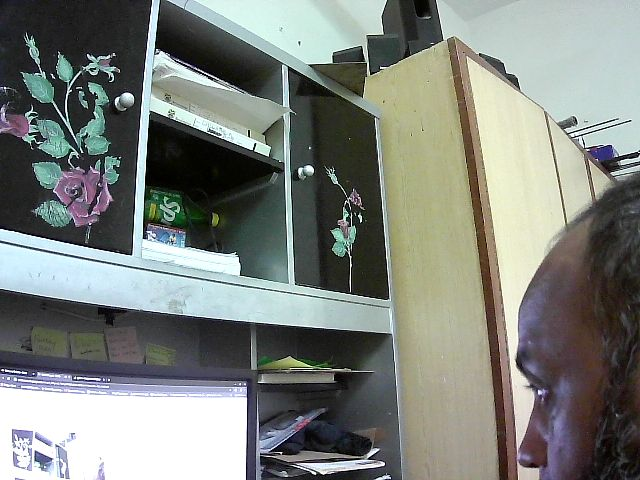

In [6]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# New Section

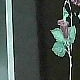

In [9]:
# prompt: /content/photo.jpg take the centre of this picture and draft a new image from 40 pixels left, right, top and bottom from the centre point the new image would be 80 * 80 pixels and  show that image aswell

from PIL import Image

# Load the image
img = Image.open('/content/photo.jpg')
width, height = img.size

# Calculate the center coordinates
center_x = width // 2
center_y = height // 2

# Define the new image size
new_size = 80

# Calculate the cropping coordinates
left = center_x - 40
top = center_y - 40
right = center_x + 40
bottom = center_y + 40

# Crop the image
cropped_img = img.crop((left, top, right, bottom))

# Resize the cropped image
resized_img = cropped_img.resize((new_size, new_size))

# Display the new image
display(resized_img)


In [14]:
# prompt: /content/cropped_image.jpg compare this image to this /content/pho2to.jpg  image and print answer on screen as true or false if they are same

from PIL import ImageChops

def compare_images(image1_path, image2_path):
  """
  Compares two images and returns True if they are the same, False otherwise.
  """
  try:
    image1 = Image.open(image1_path)
    image2 = Image.open(image2_path)
    diff = ImageChops.difference(image1, image2)
    if diff.getbbox() is None:
      print("True")
      return True
    else:
      print("False")
      return False
  except FileNotFoundError:
    print("One or both images not found.")
    return False

# Example usage:
image1_path = '/content/cropped_image.jpg'
image2_path = '/content/cropped_image.jpg'
compare_images(image1_path, image2_path)


False


False